## Error Analysis and Visualisation for XGBoost Models

### Check running python kernel

In [1]:
!which python

/home/smose_roshni/miniconda3/envs/ml-fuel-test/bin/python


### Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import glob
import os
from sklearn.metrics import r2_score

### Top Level Constants

In [3]:
drop_columns = ['lon', 'lat', 'APE']
HIGH_THRESHOLD = 1e10
result_dir = '../../data/tropics/results'
model_type = 'tropics'

### Inference Files

In [4]:
FILE_PATHS = os.path.join(result_dir, '*'+model_type+'*.csv')
FILE_NAMES = glob.glob(FILE_PATHS)
print(FILE_NAMES)

['../../data/tropics/results/tropics_output_Oct.csv', '../../data/tropics/results/tropics_output_Sept.csv', '../../data/tropics/results/tropics_output_Nov.csv', '../../data/tropics/results/tropics_output_July.csv', '../../data/tropics/results/tropics_output_Aug.csv', '../../data/tropics/results/tropics_output_Dec.csv']


### Make Dataframe

In [5]:
fli_df = pd.concat((pd.read_csv(f, index_col=False).reset_index(drop=True) for f in FILE_NAMES), ignore_index=True)

In [6]:
fli_df

,lat,lon,actual_load,predicted_load,APE
0,-29.625,-61.625,1.976608e+08,3.756035e+08,90.024298
1,-29.625,-61.375,4.213144e+07,2.524510e+08,499.198619
2,-29.625,152.375,4.372497e+09,1.508069e+09,65.510122
3,-29.375,-62.125,1.863063e+08,2.540229e+08,36.346901
4,-29.125,-60.625,9.200371e+07,2.825247e+08,207.079678
...,...,...,...,...,...
28493,28.375,83.875,1.268964e+09,4.751542e+09,274.442796
28494,28.375,84.125,2.202499e+09,4.657744e+09,111.475384
28495,28.625,-107.125,4.427577e+08,3.058281e+08,30.926531
28496,28.875,-107.125,1.194973e+08,3.637670e+08,204.414318


### Stats

In [7]:
actual_mean = fli_df['actual_load'].mean()
actual_median = fli_df['actual_load'].median()
print("Actual Fuel Load mean - {actual_mean} and median - {actual_median}".format(actual_mean = actual_mean, actual_median = actual_median))

Actual Fuel Load mean - 1748941965.6548028 and median - 579015513.7116318


In [8]:
Predicted_mean = fli_df['predicted_load'].mean()
Predicted_median = fli_df['predicted_load'].median()
print("Predicted Fuel Load mean - {Predicted_mean} and median - {Predicted_median}".format(Predicted_mean = Predicted_mean, Predicted_median = Predicted_median))

Predicted Fuel Load mean - 1864049409.365433 and median - 1056397038.0690713


### $R^2$ Score 
More details [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [9]:
r2_score(fli_df['actual_load'], fli_df['predicted_load'])

0.42549617287998154

### General Trend of Actual and Predicted Values

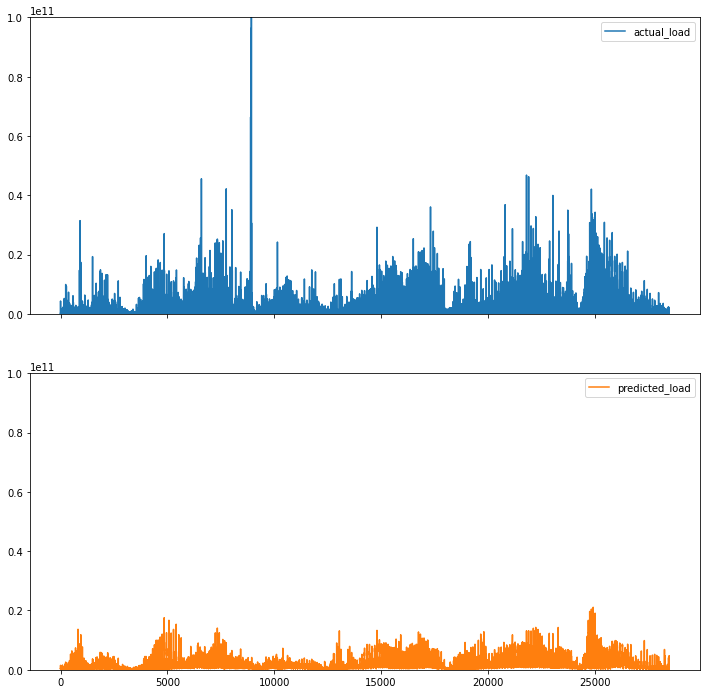

In [10]:
axes = fli_df.drop(columns=drop_columns).plot(subplots = True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 1e11)

### Distribution of high values (> HIGH_THRESHOLD)

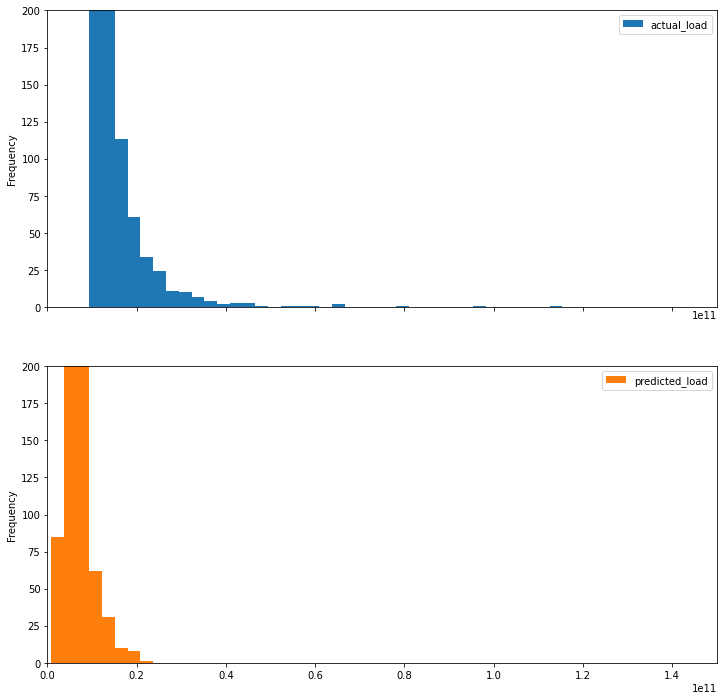

In [11]:
fli_df_high = fli_df[fli_df['actual_load'] >= HIGH_THRESHOLD].reset_index(drop=True)
axes = fli_df_high.drop(columns=drop_columns).plot.hist(bins=40, subplots=True, figsize=(12, 12))
for ax in axes:
    ax.set_ylim(0, 200)
    ax.set_xlim(0, 1.5e11)

### Distribution of Errors

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

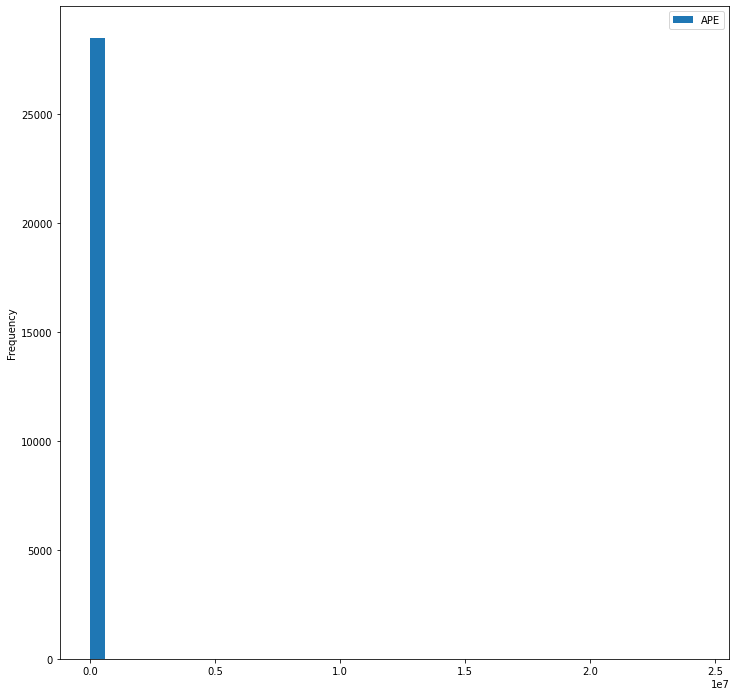

In [12]:
fli_err = fli_df.drop(columns=['lat', 'lon', 'predicted_load', 'actual_load'])
fli_err.plot.hist(bins=40, subplots=True, figsize=(12, 12))

### Error Stats

In [13]:
fli_err.max()

APE    2.434725e+07
dtype: float64

In [14]:
fli_err.mean()

APE    1279.671848
dtype: float64

In [15]:
fli_err.median()

APE    86.624229
dtype: float64